In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #For 3D Plots

#Required by Jupyter for inlining images
%matplotlib inline

Read the results file

In [3]:
data = pd.read_csv('../Data/B1_output.txt',sep='\t', header=None)
data.columns = ['Time Stamp','Date Time','Anomaly']

Read the Original Data File

In [4]:
FullData = pd.read_pickle('../Data/Beam1_RawData.pkl')
FullData.head()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 16,BPM Reading 17,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading
0,1.534476e+09,5.136406e+08,1.534476e+09,1.534476e+09,-9.910938e+08,1.534476e+09,0.003960,1.534476e+09,-0.062,-0.134,...,-1.436,-0.358,-0.765,0.013448,1.534476e+09,109.0,96.0,0.000041,-1.032389e+07,5.350423e+06
1,1.534476e+09,1.605127e+08,1.534476e+09,1.534476e+09,1.496010e+09,1.534476e+09,0.002312,1.534476e+09,-0.146,0.082,...,-1.414,-0.433,-0.730,0.005628,1.534476e+09,121.0,12.0,0.000193,1.246675e+08,1.337606e+07
2,1.534476e+09,-2.453854e+08,1.534476e+09,1.534476e+09,1.760888e+10,1.534476e+09,0.004158,1.534476e+09,-0.104,-0.037,...,-1.396,-0.379,-0.668,0.008905,1.534476e+09,265.0,144.0,0.000029,1.222839e+08,-1.704065e+06
3,1.534477e+09,3.852305e+08,1.534477e+09,1.534477e+09,-1.270084e+09,1.534477e+09,0.003327,1.534477e+09,-0.014,-0.008,...,-1.489,-0.406,-0.696,0.011799,1.534477e+09,277.0,12.0,0.000277,-1.058403e+08,3.210254e+07
4,1.534477e+09,-2.889211e+08,1.534477e+09,1.534477e+09,1.024349e+10,1.534477e+09,0.004684,1.534477e+09,0.008,-0.017,...,-1.402,-0.345,-0.696,0.021249,1.534477e+09,421.0,144.0,0.000033,7.113532e+07,-2.006396e+06


Scale the Data

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
features = ['normAbort Gap Reading','normLHC-SPS','normBLM','BPM MSE','BPM Reading 1','BPM Reading 2','BPM Reading 3','BPM Reading 4',
           'BPM Reading 5','BPM Reading 6','BPM Reading 7','BPM Reading 8','BPM Reading 9','BPM Reading 10',
           'BPM Reading 11','BPM Reading 12','BPM Reading 13','BPM Reading 14','BPM Reading 15','BPM Reading 16',
           'BPM Reading 17','BPM Reading 18','Change in Number of Bunches']
#Separate out the features
x = FullData.loc[:,features].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(columns=features,data=x)

In [7]:
FullData['normLHC-SPS'] = x['normLHC-SPS']
FullData['BPM MSE'] = x['BPM MSE']
FullData['normBLM'] = x['normBLM']

Merge the results with this raw data

In [8]:
FullData['Time Stamp (int)'] = FullData['Time Stamp LHC'].apply(round)

In [9]:
to_append = []
for index in FullData.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == FullData['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
FullData['Actual'] = to_append

In [10]:
FullData['Actual'] = FullData['Actual'].replace(np.nan,0)

In [11]:
FullData.describe()

,Time Stamp Abort Gap,Abort Gap Reading,Time Stamp SPS,Time Stamp LHC,LHC-SPS,Time Stamp BLM,BLM,Time Stamp BPM,BPM Reading 1,BPM Reading 2,...,BPM Reading 18,BPM MSE,Time Stamp Bunches,Number of Bunches,Change in Number of Bunches,normBLM,normLHC-SPS,normAbort Gap Reading,Time Stamp (int),Actual
count,8.560000e+02,8.560000e+02,8.560000e+02,8.560000e+02,8.560000e+02,8.560000e+02,856.000000,8.560000e+02,856.000000,856.000000,...,856.000000,846.000000,8.560000e+02,856.000000,856.000000,846.000000,846.000000,8.560000e+02,8.560000e+02,856.000000
mean,1.536113e+09,-2.200928e+08,1.536113e+09,1.536113e+09,-4.528904e+10,1.536113e+09,0.010939,1.536113e+09,0.093875,0.835018,...,-0.356593,-0.003489,1.536113e+09,1084.873832,113.623832,-0.003942,0.005539,-6.645712e+07,1.536113e+09,0.105140
std,8.943061e+05,3.123970e+09,8.943051e+05,8.943047e+05,1.118281e+11,8.943051e+05,0.010459,8.943051e+05,0.164527,0.332791,...,0.169570,1.002075,8.943051e+05,798.228930,47.455376,1.004019,0.990738,6.813602e+08,8.943047e+05,0.306913
min,1.534476e+09,-2.481526e+10,1.534476e+09,1.534476e+09,-1.130185e+12,1.534476e+09,0.000070,1.534476e+09,-0.631000,-0.146000,...,-0.944000,-1.915980,1.534476e+09,2.000000,1.000000,-0.647251,-13.213143,-1.781034e+10,1.534476e+09,0.000000
25%,1.535547e+09,-2.748561e+08,1.535547e+09,1.535547e+09,-4.784693e+10,1.535547e+09,0.005103,1.535547e+09,-0.010000,0.670750,...,-0.460000,-0.681014,1.535547e+09,396.000000,96.000000,-0.369122,-0.024304,-2.186565e+06,1.535547e+09,0.000000
50%,1.535989e+09,2.438853e+08,1.535989e+09,1.535989e+09,-1.530089e+10,1.535989e+09,0.008615,1.535989e+09,0.062500,0.838500,...,-0.363500,-0.256553,1.535989e+09,1068.000000,144.000000,-0.265663,0.083272,2.019374e+06,1.535989e+09,0.000000
75%,1.536504e+09,7.063663e+08,1.536504e+09,1.536504e+09,6.148587e+09,1.536504e+09,0.012227,1.536504e+09,0.183000,1.054000,...,-0.272500,0.589745,1.536504e+09,1740.000000,144.000000,-0.022204,0.173344,6.761314e+06,1.536504e+09,0.000000
max,1.538122e+09,8.106263e+09,1.538122e+09,1.538122e+09,5.546164e+10,1.538122e+09,0.072525,1.538122e+09,0.556000,1.561000,...,0.128000,4.233406,1.538122e+09,2556.000000,144.000000,16.328967,6.244077,1.087474e+09,1.538122e+09,1.000000


In [12]:
is_anomaly = FullData['Actual']==1
Anomalies = FullData[is_anomaly]

normal = FullData['Actual']==0
Inliers = FullData[normal]

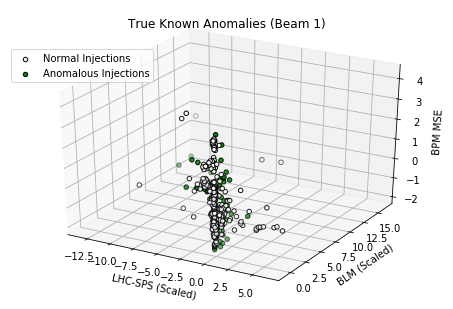

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
anomalies = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
ax.set_xlabel('LHC-SPS (Scaled)')
ax.set_ylabel('BLM (Scaled)')
ax.set_zlabel('BPM MSE')
ax.set_title('True Known Anomalies (Beam 1)')
plt.legend((normal, anomalies),('Normal Injections', 'Anomalous Injections'), loc=(0,0.75))
plt.savefig('../Dissertation/images/TrueAnomalies', bbox_inches='tight')
plt.show()

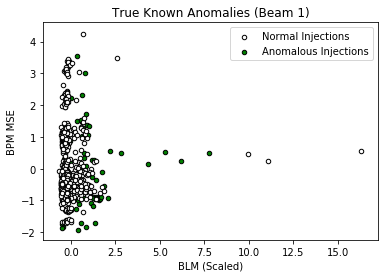

In [14]:
plt.figure()
anomalies = plt.scatter(Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE')
plt.title('True Known Anomalies (Beam 1)')
plt.legend((normal, anomalies),('Normal Injections', 'Anomalous Injections'),loc='best')
plt.savefig('../Dissertation/images/TrueAnomalies_BLMBPM', bbox_inches='tight')
plt.show()

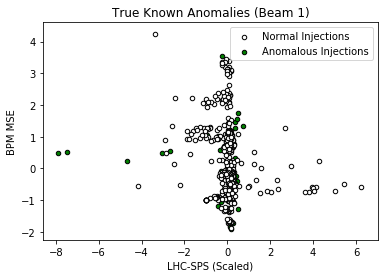

In [83]:
plt.figure()
anomalies = plt.scatter(Anomalies['normLHC-SPS'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normLHC-SPS'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
plt.xlabel('LHC-SPS (Scaled)')
plt.ylabel('BPM MSE')
plt.title('True Known Anomalies (Beam 1)')
plt.legend((normal, anomalies),('Normal Injections', 'Anomalous Injections'),loc='best')
plt.savefig('../Dissertation/images/TrueAnomalies_BPMIntensity', bbox_inches='tight')
plt.show()

### 3D LOF

In [17]:
_3DLoF = pd.read_pickle('../Data/Anomalies_from_3D_LoF.pkl')

In [18]:
Results = data[:82]
Results = Results.set_index(_3DLoF.index)
_3DLoF['Actual'] = Results['Anomaly']

In [19]:
September14_start = 1536883200
September16_end = 1537142399

Remove results of 14-16 September

In [23]:
for i in _3DLoF.index:
    if _3DLoF['Time Stamp LHC'][i] >= September14_start and _3DLoF['Time Stamp LHC'][i] <= September16_end:
        _3DLoF['Actual'][i] = -1

In [24]:
FullData['3D LoF Results'] = _3DLoF['Actual']
FullData = FullData.replace(np.nan,-1)

In [27]:
is_anomaly = FullData['3D LoF Results']==1
Anomalies = FullData[is_anomaly]

normal = FullData['3D LoF Results']==-1
Inliers = FullData[normal]

badly_detected = FullData['3D LoF Results']==0
Bads = FullData[badly_detected]

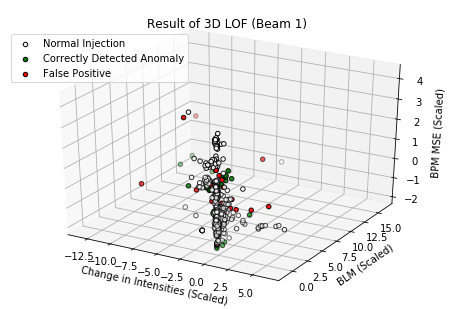

In [29]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensities (Scaled)')
ax.set_ylabel('BLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of 3D LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/3D_LOF_Results', bbox_inches='tight')
plt.show()

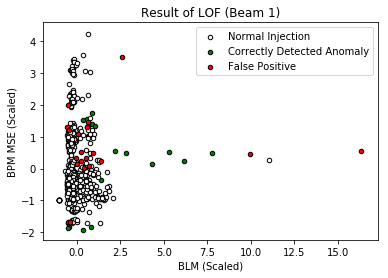

In [30]:
plt.figure()
correct = plt.scatter(Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/3D_LOF_BLMBPM', bbox_inches='tight')
plt.show()

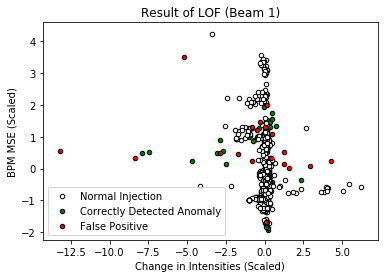

In [31]:
plt.figure()
correct = plt.scatter(Anomalies['normLHC-SPS'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normLHC-SPS'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normLHC-SPS'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('Change in Intensities (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of LOF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/3D_LOF_ResultsBPMIntensity', bbox_inches='tight')
plt.show()

### 3D DBSCAN

In [32]:
DBSCAN = pd.read_pickle('../Data/Anomalies_from_3D_DBSCAN.pkl')

In [33]:
DBSCAN['Time Stamp (int)'] = DBSCAN['Time Stamp LHC'].apply(round)
to_append = []
for index in DBSCAN.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == DBSCAN['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
DBSCAN['Actual'] = to_append

In [38]:
for i in DBSCAN.index:
    if DBSCAN['Time Stamp LHC'][i] >= September14_start and DBSCAN['Time Stamp LHC'][i] <= September16_end:
        DBSCAN['Actual'][i] = -1

In [39]:
FullData['DBSCAN Results'] = DBSCAN['Actual']
FullData = FullData.replace(np.nan,-1)

In [40]:
is_anomaly = FullData['DBSCAN Results']==1
Anomalies = FullData[is_anomaly]

normal = FullData['DBSCAN Results']==-1
Inliers = FullData[normal]

badly_detected = FullData['DBSCAN Results']==0
Bads = FullData[badly_detected]

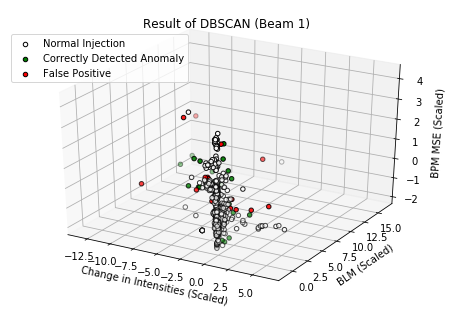

In [41]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('Change in Intensities (Scaled)')
ax.set_ylabel('BLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of DBSCAN (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/DBSCAN_Results', bbox_inches='tight')
plt.show()

### Full Model

In [42]:
Full = pd.read_pickle('../Data/Anomalies_from_Full_LoF.pkl')

In [43]:
Full['Time Stamp (int)'] = Full['Time Stamp LHC'].apply(round)
to_append = []
for index in Full.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == Full['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
Full['Actual'] = to_append

In [44]:
for i in Full.index:
    if Full['Time Stamp LHC'][i] >= September14_start and Full['Time Stamp LHC'][i] <= September16_end:
        Full['Actual'][i] = -1

/home/marc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
FullData['Full Model Results'] = Full['Actual']
FullData = FullData.replace(np.nan,-1)

In [46]:
is_anomaly = FullData['Full Model Results']==1
Anomalies = FullData[is_anomaly]

normal = FullData['Full Model Results']==-1
Inliers = FullData[normal]

badly_detected = FullData['Full Model Results']==0
Bads = FullData[badly_detected]

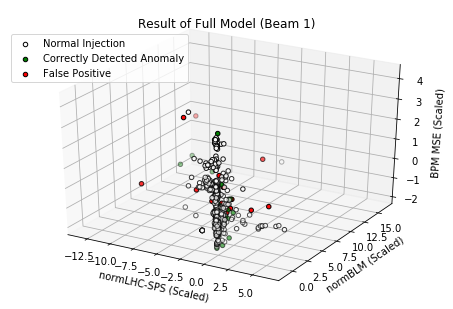

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('normLHC-SPS (Scaled)')
ax.set_ylabel('normBLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of Full Model (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/Full_Results', bbox_inches='tight')
plt.show()

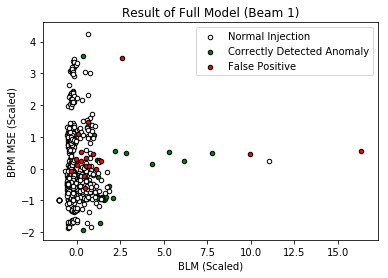

In [48]:
plt.figure()
correct = plt.scatter(Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('BLM (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of Full Model (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/Full_BLMBPM', bbox_inches='tight')
plt.show()

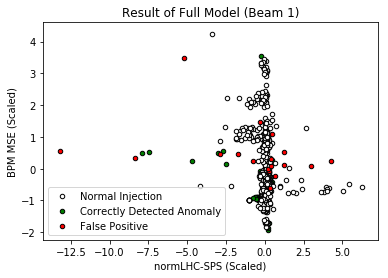

In [49]:
plt.figure()
correct = plt.scatter(Anomalies['normLHC-SPS'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = plt.scatter(Inliers['normLHC-SPS'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = plt.scatter(Bads['normLHC-SPS'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
plt.xlabel('normLHC-SPS (Scaled)')
plt.ylabel('BPM MSE (Scaled)')
plt.title('Result of Full Model (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'),loc='best')
plt.savefig('../Dissertation/images/Full_ResultsBPMIntensity', bbox_inches='tight')
plt.show()

### PCA LoF

In [50]:
PCA = pd.read_pickle('../Data/Anomalies_from_PCA_LoF.pkl')

In [51]:
PCA['Time Stamp (int)'] = PCA['Time Stamp LHC'].apply(round)
to_append = []
for index in PCA.index.values:
    found = 0
    for subindex in data.index.values:
        if data['Time Stamp'][subindex] == PCA['Time Stamp (int)'][index]:
            found = 1
            to_append.append(data['Anomaly'][subindex])
            break
    if found == 0:
        to_append.append(np.nan)
PCA['Actual'] = to_append

In [52]:
for i in PCA.index:
    if PCA['Time Stamp LHC'][i] >= September14_start and PCA['Time Stamp LHC'][i] <= September16_end:
        PCA['Actual'][i] = -1

/home/marc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
FullData['PCA Model Results'] = PCA['Actual']
FullData = FullData.replace(np.nan,-1)

In [72]:
is_anomaly = FullData['PCA Model Results']==1
Anomalies = FullData[is_anomaly]

normal = FullData['PCA Model Results']==-1
Inliers = FullData[normal]

badly_detected = FullData['PCA Model Results']==0
Bads = FullData[badly_detected]

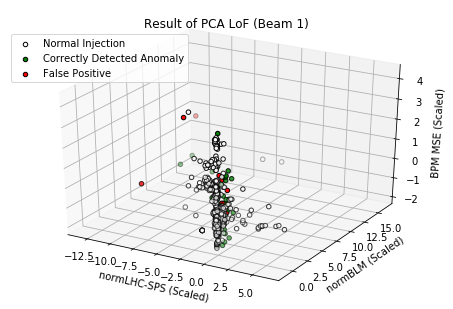

In [73]:
fig = plt.figure()
ax = Axes3D(fig)
correct = ax.scatter(Anomalies['normLHC-SPS'],Anomalies['normBLM'],Anomalies['BPM MSE'],c='green',
                edgecolor='k', s=20)
normal = ax.scatter(Inliers['normLHC-SPS'],Inliers['normBLM'],Inliers['BPM MSE'],c='white',
                edgecolor='k', s=20)
incorrect = ax.scatter(Bads['normLHC-SPS'],Bads['normBLM'],Bads['BPM MSE'],c='red',
                edgecolor='k', s=20)
ax.set_xlabel('normLHC-SPS (Scaled)')
ax.set_ylabel('normBLM (Scaled)')
ax.set_zlabel('BPM MSE (Scaled)')
ax.set_title('Result of PCA LoF (Beam 1)')
plt.legend((normal, correct, incorrect),('Normal Injection', 'Correctly Detected Anomaly', 'False Positive'), loc=(0,0.75))
plt.savefig('../Dissertation/images/PCA_Results', bbox_inches='tight')
plt.show()

In [74]:
FullData.to_pickle('../Data/FullDatawithResults.pkl')

### Work Out False Negatives

In [75]:
cond = FullData['Actual']==1
temp = FullData[cond]
cond = temp['3D LoF Results']==-1
temp = temp[cond]

_3DLoFFalseNegatives = len(temp)
_3DLoFFalseNegatives

51

In [76]:
cond = FullData['Actual']==1
temp = FullData[cond]
cond = temp['DBSCAN Results']==-1
temp = temp[cond]

DBSCANFalseNegatives = len(temp)
DBSCANFalseNegatives

67

In [77]:
cond = FullData['Actual']==1
temp = FullData[cond]
cond = temp['Full Model Results']==-1
temp = temp[cond]

FullFalseNegatives = len(temp)
FullFalseNegatives

44

In [78]:
cond = FullData['Actual']==1
temp = FullData[cond]
cond = temp['PCA Model Results']==-1
temp = temp[cond]

PCAFalseNegatives = len(temp)
PCAFalseNegatives

47

### Work out True Negatives

In [79]:
cond = FullData['Actual']==0
temp = FullData[cond]
cond = temp['3D LoF Results']==-1
temp = temp[cond]

_3DLoFTrueNegatives = len(temp)
_3DLoFTrueNegatives

745

In [80]:
cond = FullData['Actual']==0
temp = FullData[cond]
cond = temp['DBSCAN Results']==-1
temp = temp[cond]

DBSCANTrueNegatives = len(temp)
DBSCANTrueNegatives

749

In [81]:
cond = FullData['Actual']==0
temp = FullData[cond]
cond = temp['Full Model Results']==-1
temp = temp[cond]

FullTrueNegatives = len(temp)
FullTrueNegatives

748

In [82]:
cond = FullData['Actual']==0
temp = FullData[cond]
cond = temp['PCA Model Results']==-1
temp = temp[cond]

PCATrueNegatives = len(temp)
PCATrueNegatives

746